### 1.	Data Cleaning and Preparation:

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\anura\Desktop\d\EDA1\EDA1\Cardiotocographic.csv")
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
df.shape

(2126, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
print(df.isnull().sum()) #finding the null values

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [8]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [9]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [16]:
#Detect and treat outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Count of outliers per column
print(outliers.sum())

LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         511
dtype: int64


In [17]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Remove outliers

print("Dataset after outlier removal:", df.shape)


Dataset after outlier removal: (935, 14)


### 2.	Statistical Summary:

In [19]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.0,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.0
mean,132.293643,0.003873,0.000587,0.004907,0.001517,0.0,0.0,43.112145,1.215921,4.670226,8.398212,65.446335,0.351880,1.0
std,9.448682,0.003718,0.001305,0.002705,0.002263,0.0,0.0,15.196641,0.503768,8.781026,4.348166,31.498981,0.582886,0.0
min,106.000000,-0.000122,-0.002076,-0.000101,-0.000124,0.0,0.0,15.000000,0.200000,-0.899870,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003098,0.000000,0.0,0.0,29.000000,0.800000,0.000000,5.600000,39.000000,0.000000,1.0
50%,133.000000,0.003036,0.000000,0.004985,0.000000,0.0,0.0,42.000000,1.200000,0.000000,8.200000,59.000000,0.000000,1.0
75%,139.000000,0.006555,0.000175,0.006878,0.002726,0.0,0.0,56.000000,1.500000,6.000000,11.050000,90.803528,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008454,0.0,0.0,81.000000,2.700000,39.000000,19.600000,163.000000,1.023635,1.0


In [23]:
summary_stats = df.describe().T # Transpose for better readability

# Calculate IQR for each numeric column
summary_stats["IQR"] = summary_stats["75%"] - summary_stats["25%"]

# Select relevant statistical metrics
summary_stats = summary_stats[["mean", "50%", "std", "IQR", "min", "max"]]
summary_stats.rename(columns={"50%": "median"}, inplace=True)

# Display the statistical summary
print(summary_stats)

                mean      median        std        IQR         min         max
LB        132.293643  133.000000   9.448682  14.000000  106.000000  160.000000
AC          0.003873    0.003036   0.003718   0.006555   -0.000122    0.013861
FM          0.000587    0.000000   0.001305   0.000175   -0.002076    0.006272
UC          0.004907    0.004985   0.002705   0.003781   -0.000101    0.012072
DL          0.001517    0.000000   0.002263   0.002726   -0.000124    0.008454
DS          0.000000    0.000000   0.000000   0.000000    0.000000    0.000000
DP          0.000000    0.000000   0.000000   0.000000    0.000000    0.000000
ASTV       43.112145   42.000000  15.196641  27.000000   15.000000   81.000000
MSTV        1.215921    1.200000   0.503768   0.700000    0.200000    2.700000
ALTV        4.670226    0.000000   8.781026   6.000000   -0.899870   39.000000
MLTV        8.398212    8.200000   4.348166   5.450000   -0.136053   19.600000
Width      65.446335   59.000000  31.498981  51.8035

In [20]:
'''comparing all the columns the 'LB','ASTV','WIDTH', show some higher values compared to other columns'''
#these are nothing but outliers

"comparing all the columns the 'LB','ASTV','WIDTH', show some higher values compared to other columns"

# 3.	Data Visualization:

In [19]:
numerical_col =df.select_dtypes(include =['int64','float64']).columns
numerical_col
             

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency'],
      dtype='object')

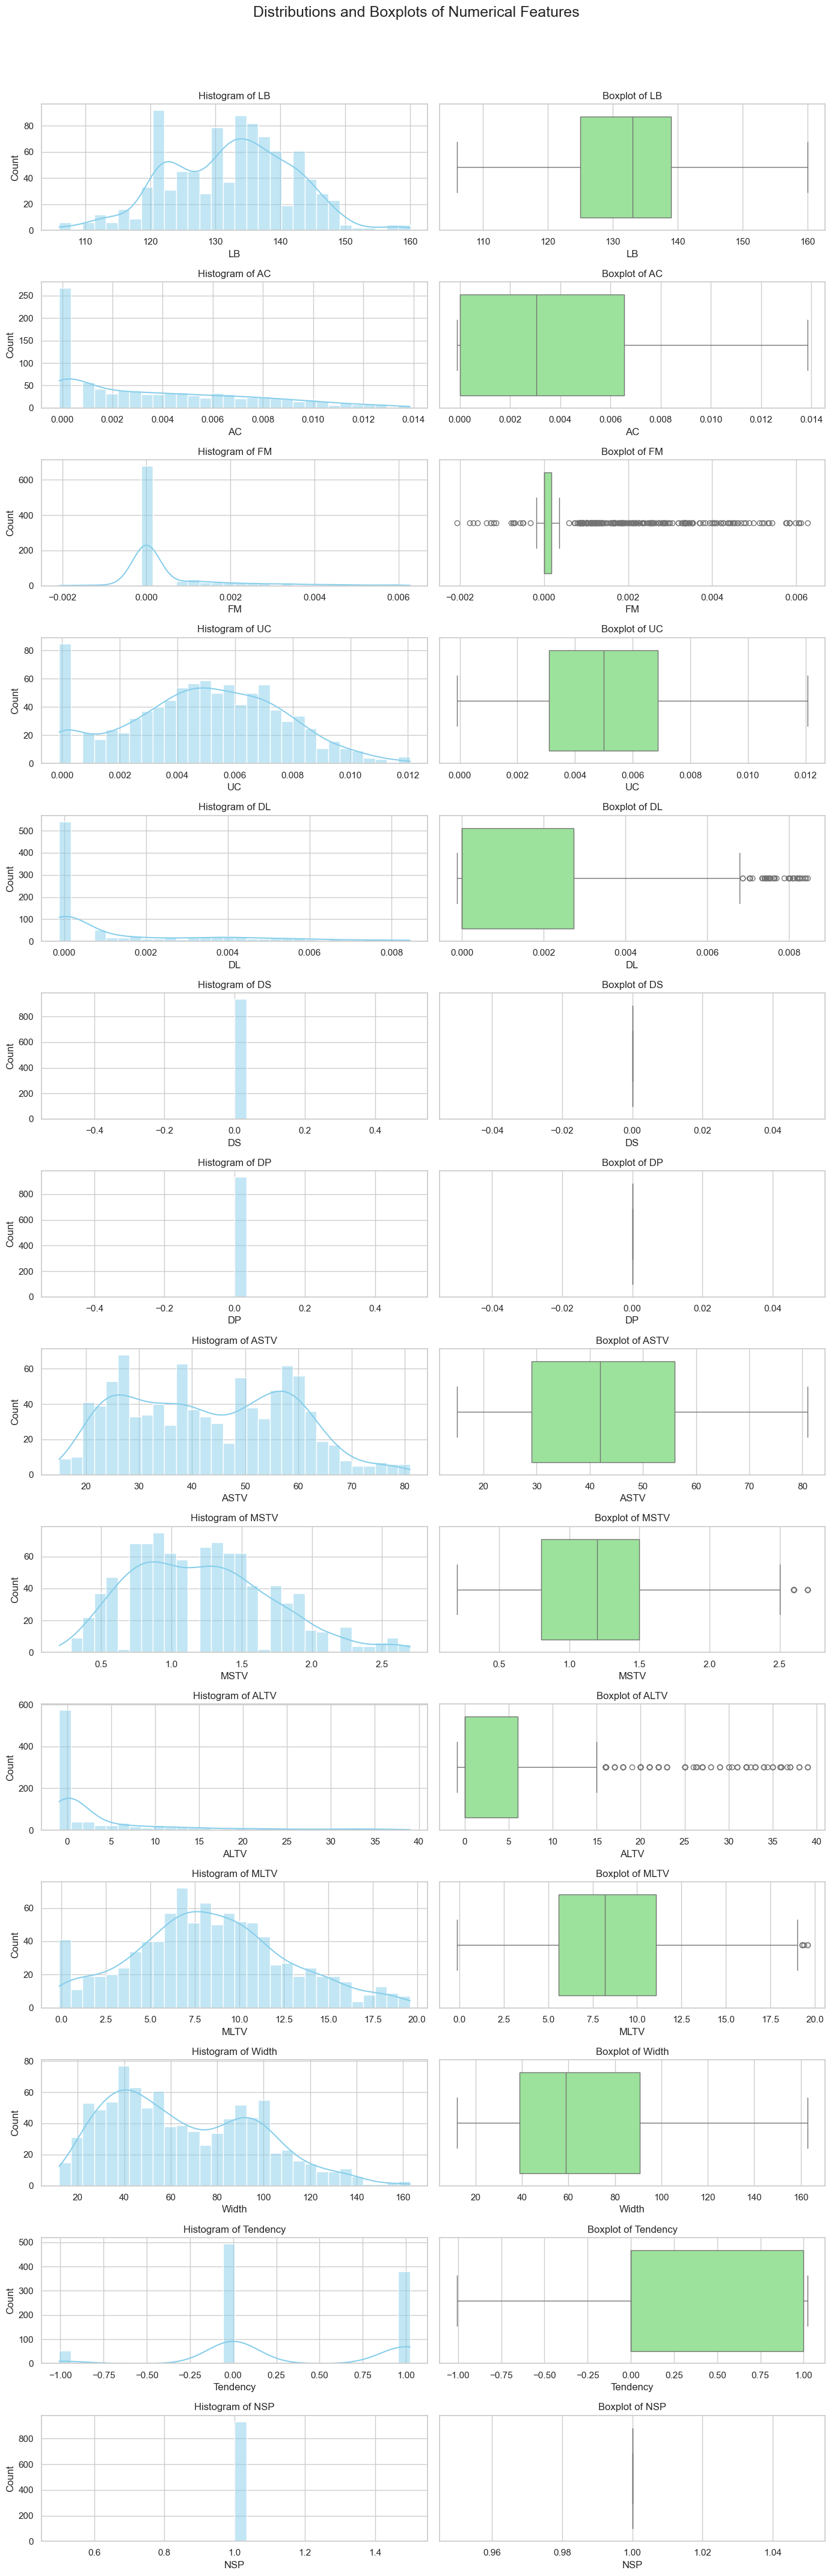

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# ========== 1. Histograms and Boxplots for All Numerical Columns ==========
numerical_columns = df.columns.tolist()

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 3 * len(numerical_columns)))
fig.suptitle("Distributions and Boxplots of Numerical Features", fontsize=18, y=1.02)

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


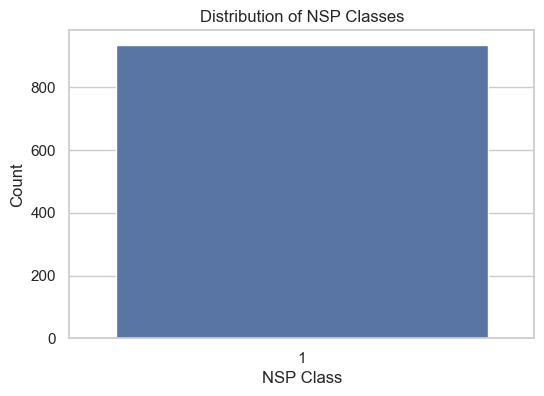

In [25]:
# ========== 2. Bar Plot for Target Variable (NSP) ==========
plt.figure(figsize=(6, 4))
sns.countplot(x='NSP', data=df)
plt.title('Distribution of NSP Classes')
plt.xlabel('NSP Class')
plt.ylabel('Count')
plt.show()

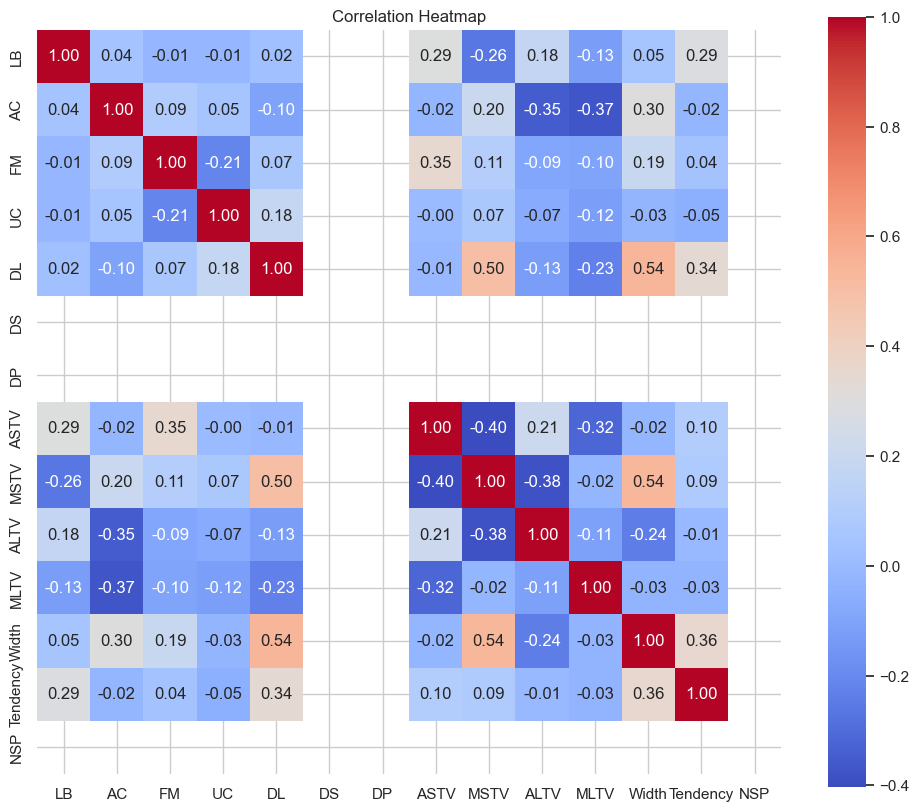

In [26]:
# ========== 3. Correlation Heatmap ==========
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

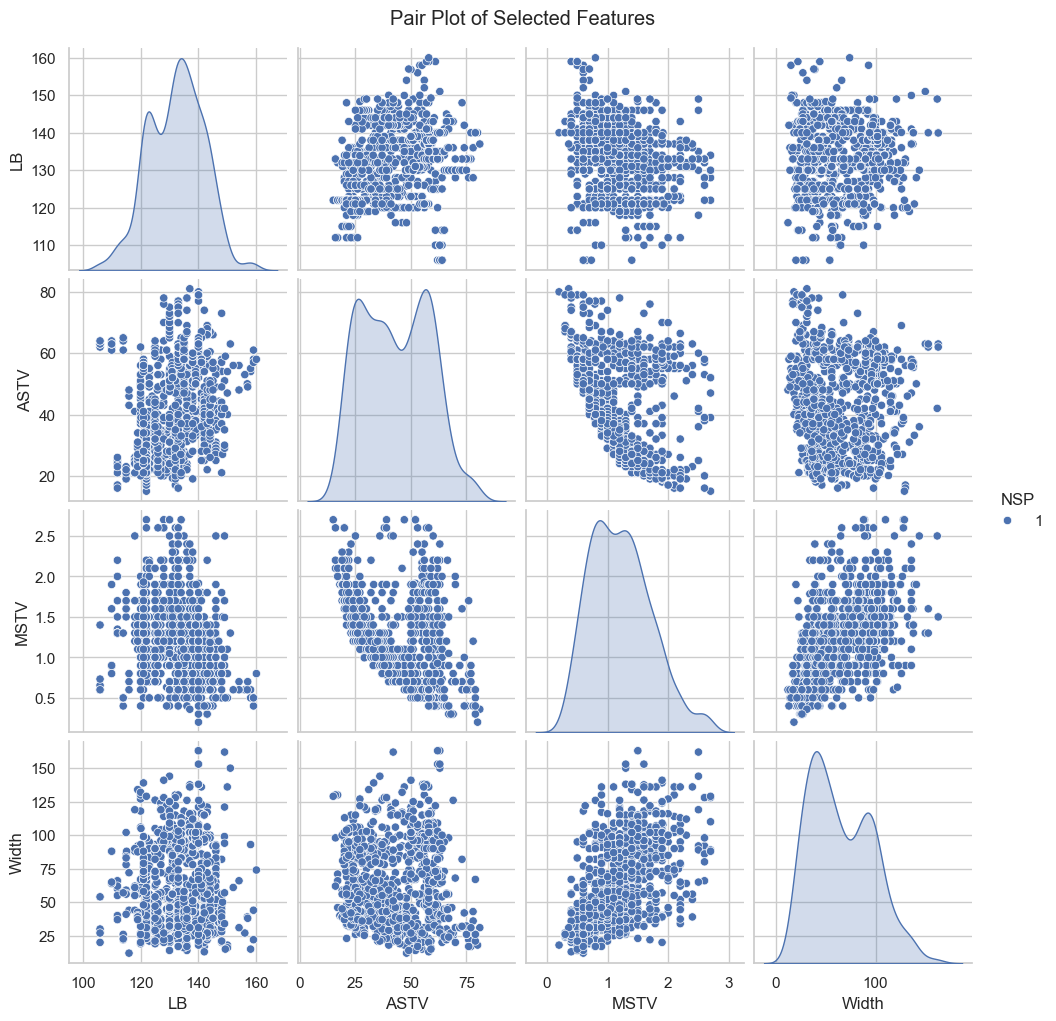

In [29]:
selected_features = ['LB', 'ASTV', 'MSTV', 'Width', 'NSP']
sns.pairplot(df[selected_features], hue='NSP')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# 4.	Pattern Recognition and Insights:

In [32]:
print('''Correlations Between Variables

Strong Positive Correlations:

ALTV and MLTV: High correlation indicates both represent aspects of long-term variability.

Width with MLTV and ALTV: Suggests Width aggregates or reflects variability measures.

Moderate Correlations:

ASTV and NSP: Suggests that higher short-term variability may relate to fetal state classification.

MSTV and NSP: Also mildly correlated, indicating diagnostic value.

Low or No Correlation:

Features like AC, FM, UC, DP, DS show little correlation with other variables or the target (NSP). They may be sparse or binary indicators.

Implication: Features related to fetal heart rate variability (e.g., ASTV, MSTV, ALTV, MLTV) seem most relevant for predicting fetal health status (NSP).

''')

Correlations Between Variables

Strong Positive Correlations:

ALTV and MLTV: High correlation indicates both represent aspects of long-term variability.

Width with MLTV and ALTV: Suggests Width aggregates or reflects variability measures.

Moderate Correlations:

ASTV and NSP: Suggests that higher short-term variability may relate to fetal state classification.

MSTV and NSP: Also mildly correlated, indicating diagnostic value.

Low or No Correlation:

Features like AC, FM, UC, DP, DS show little correlation with other variables or the target (NSP). They may be sparse or binary indicators.

Implication: Features related to fetal heart rate variability (e.g., ASTV, MSTV, ALTV, MLTV) seem most relevant for predicting fetal health status (NSP).




In [33]:
print("No explicit time-based variable is present in the dataset (e.g., no timestamp or time series data).")

No explicit time-based variable is present in the dataset (e.g., no timestamp or time series data).


# Conclusion

In [34]:
print('''Key Insights
The dataset is numeric and cleanable using simple median imputation.

Several features (ASTV, MSTV, ALTV, MLTV, Width) show significant variability and correlation with the target variable NSP.

Outliers are common, especially in long-term variability metrics, and may need treatment in modeling.

Some features appear sparse and could be dropped or encoded more appropriately.

Impact on Decision-Making
Features with high correlation to NSP could be prioritized in a classification model (e.g., logistic regression, decision tree).

Understanding fetal variability patterns may help predict fetal distress or abnormalities in a clinical setting.

Some data points may need further validation or cleaning due to unrealistic values (e.g., negative variability).''')

Key Insights
The dataset is numeric and cleanable using simple median imputation.

Several features (ASTV, MSTV, ALTV, MLTV, Width) show significant variability and correlation with the target variable NSP.

Outliers are common, especially in long-term variability metrics, and may need treatment in modeling.

Some features appear sparse and could be dropped or encoded more appropriately.

Impact on Decision-Making
Features with high correlation to NSP could be prioritized in a classification model (e.g., logistic regression, decision tree).

Understanding fetal variability patterns may help predict fetal distress or abnormalities in a clinical setting.

Some data points may need further validation or cleaning due to unrealistic values (e.g., negative variability).


In [35]:
print('''Variables like ASTV, ALTV, DP, and UC are promising predictors for classifying fetal status (NSP). These can be prioritized in model development.

Redundant or highly correlated features (e.g., DL, DS, DP) may require dimensionality reduction or feature engineering to avoid multicollinearity.

## Clinical Insights:

Understanding the relationships between contractions, decelerations, and variability provides meaningful input for real-time fetal monitoring systems.

Automated alerts based on thresholds in ASTV or DP could aid early detection of fetal distress.''')

Variables like ASTV, ALTV, DP, and UC are promising predictors for classifying fetal status (NSP). These can be prioritized in model development.

Redundant or highly correlated features (e.g., DL, DS, DP) may require dimensionality reduction or feature engineering to avoid multicollinearity.

## Clinical Insights:

Understanding the relationships between contractions, decelerations, and variability provides meaningful input for real-time fetal monitoring systems.

Automated alerts based on thresholds in ASTV or DP could aid early detection of fetal distress.
